<a href="https://colab.research.google.com/github/Ayushraj6202/Potato-Disease-Detector/blob/main/Copy_of_Potato_Disease_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing all required libraries

In [85]:
import pandas as pd
import numpy as np
import os

In [86]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [87]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.models import Sequential

Genetator - it will create batches of image which will be trained to model, it is very helpful it there is large data

In [88]:
import keras

# Path to the main directory
data_dir = '/content/drive/MyDrive/Colab Notebooks/Potato Plant Disease'

# Create the dataset
dataset = keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=32,
    image_size=(224, 224)
)

test_dataset = keras.utils.image_dataset_from_directory(
    data_dir,
    batch_size=32,
    image_size=(224, 224)
)

Found 2152 files belonging to 3 classes.
Found 2152 files belonging to 3 classes.


In [89]:
len(dataset),len(test_dataset)
print(dataset==test_dataset)

False


Potato___Late_blight


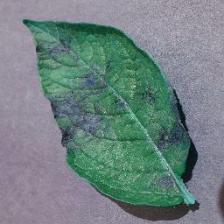

Potato___Late_blight


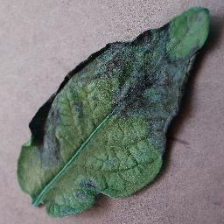

Potato___Late_blight


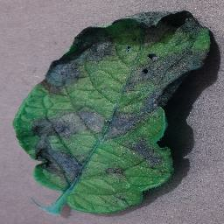

In [90]:
import matplotlib.pyplot as plt
class_names = dataset.class_names
# print(class_names)
for images, labels in dataset.take(3):
    print(class_names[labels[0]])
    cv2_imshow(images[0].numpy())



Dividing each pixel value by 255 to normalize values

In [91]:
def process(image,label):
    image=tf.cast(image/255.0,tf.float32)
    return image,label

dataset=dataset.map(process)
test_dataset=test_dataset.map(process)

Creating CNN architecture

In [92]:
from keras.layers import BatchNormalization

In [93]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),input_shape=(224,224,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(3,activation='softmax'))

In [94]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 222, 222, 64)      1792      
                                                                 
 batch_normalization_17 (Ba  (None, 222, 222, 64)      256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 111, 111, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 109, 109, 64)      36928     
                                                                 
 batch_normalization_18 (Ba  (None, 109, 109, 64)      256       
 tchNormalization)                                               
                                                      

In [95]:
model.compile(optimizer='Adam',loss="SparseCategoricalCrossentropy",metrics = ['accuracy'])
history = model.fit(dataset,epochs=10,validation_data=test_dataset)

Epoch 1/10
68/68 [==============================] - 21s 268ms/step - loss: 1.5142 - accuracy: 0.7458 - val_loss: 27.1814 - val_accuracy: 0.4647
Epoch 2/10
68/68 [==============================] - 20s 282ms/step - loss: 1.1014 - accuracy: 0.7955 - val_loss: 30.2471 - val_accuracy: 0.4647
Epoch 3/10
68/68 [==============================] - 18s 263ms/step - loss: 1.0084 - accuracy: 0.7965 - val_loss: 28.9467 - val_accuracy: 0.4647
Epoch 4/10
68/68 [==============================] - 16s 225ms/step - loss: 0.5114 - accuracy: 0.8522 - val_loss: 28.4286 - val_accuracy: 0.4647
Epoch 5/10
68/68 [==============================] - 16s 220ms/step - loss: 0.4153 - accuracy: 0.8834 - val_loss: 24.8358 - val_accuracy: 0.4647
Epoch 6/10
68/68 [==============================] - 19s 277ms/step - loss: 0.3223 - accuracy: 0.9001 - val_loss: 26.6128 - val_accuracy: 0.4647
Epoch 7/10
68/68 [==============================] - 17s 235ms/step - loss: 0.3591 - accuracy: 0.9038 - val_loss: 1.5432 - val_accuracy: 

In [96]:
loss,acc = model.evaluate(test_dataset)

68/68 [==============================] - 8s 112ms/step - loss: 0.2241 - accuracy: 0.9219


In [97]:
print("loss ",loss)
print("accuracy ",acc)

loss  0.22406741976737976
accuracy  0.921933114528656


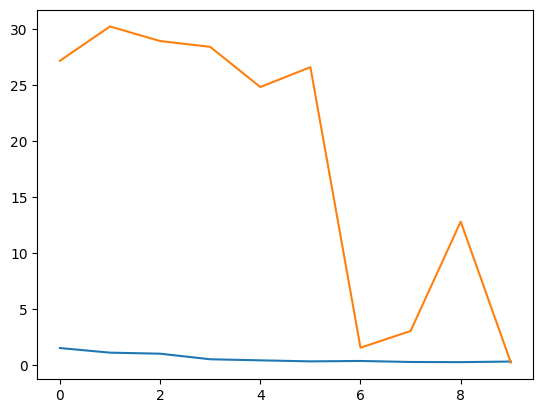

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

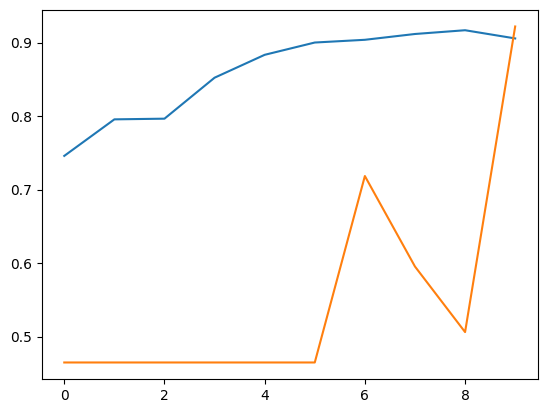

In [99]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [100]:
folder = "/content/drive/MyDrive/Colab Notebooks/Model"
filename="potato_disease_model.h5"
filepath= os.path.join(folder,filename)
model.save(filepath)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [101]:
lst = ["Early Blight","Late Blight","Healthy"]

Function to predict patato leaf having which disease, it takes input of path of image.

In [102]:
def result():
    input1 = input()
    img = cv2.imread(input1)
    cv2_imshow(img)
    img = cv2.resize(img,(224,224))
    img =img /255.0
    img = np.reshape(img,[1,224,224,3])
    y_pred = model.predict(img)
    print(y_pred)
    ind = y_pred.argmax()
    print("Disease is " ,lst[ind])
    return

/content/ealy1.jpg


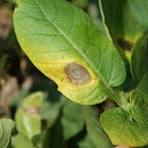

1/1 [==============================] - 0s 106ms/step
[[1.0000000e+00 3.4746668e-15 1.3847096e-20]]
Disease is  Early Blight


In [103]:
result()

/content/heal2.jpg


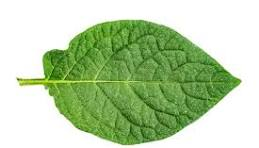

1/1 [==============================] - 0s 18ms/step
[[0.00871827 0.21826865 0.77301306]]
Disease is  Healthy


In [104]:
result()

/content/late2.JPG


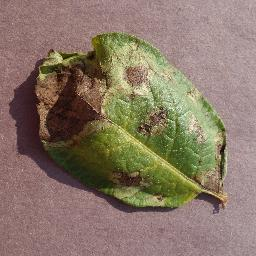

1/1 [==============================] - 0s 18ms/step
[[0.02087176 0.7824912  0.19663706]]
Disease is  Late Blight


In [105]:
result()